#1.Ejemplo de una regresión lineal Múltiple
#Concrete Compressive Strength Data Set
Descripción: El concreto es el material más importante en la ingeniería civil. La resistencia a la compresión del concreto es una función altamente no lineal de la edad y los ingredientes.

Instancias: 1030

Atributos: 8

Output: Resistencia a la compresión en MPa 

1. Cemento 
2. Escoria de alto horno 
3. Cenizas volantes 
4. Agua
5. Superplastificante 
6. Agregado grueso
7. Agregado fino 
8. Edad 
9. Resistencia a la compresión del hormigón
 

#2. Montando google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/Shareddrives/Data Science para Geociencias/6. Métodos de ML/6.1 Regresión lineal múltiple'
name = 'Concrete_data.csv'

#3. Importación de librerías 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
path_file = os.path.join(path,name)

#4. Lectura y visualuzación del dataset

In [17]:
dataset = pd.read_csv(path_file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


Text(0, 0.5, 'Concrete compressive strength')

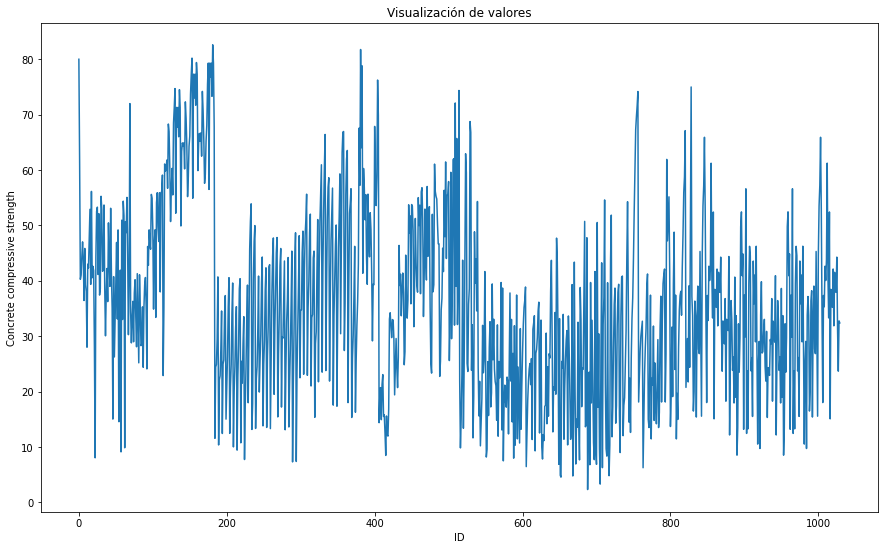

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(y)

plt.title('Visualización de valores')
plt.xlabel('ID')
plt.ylabel('Concrete compressive strength')


#5.Diviendo el dataset en conjunto para entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, shuffle=True)

print(f'Dimension de los datos de entrenamiento {X_train.shape}')
print(f'Dimension de los datos de prueba {X_test.shape}')

Dimension de los datos de entrenamiento (824, 8)
Dimension de los datos de prueba (206, 8)


#6. Creación y entrenamiento de un modelo de regresión lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.score(X_train, y_train)

0.6091237370441138

#7. Prediciendo valores con el conjunto de prueba

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
predicted = y_pred
expected = y_test

In [ ]:
regressor.score(X_test, y_test)

0.6369606518338298

# 8.  Visualizando los valores esperados y los predichos (mejorar)

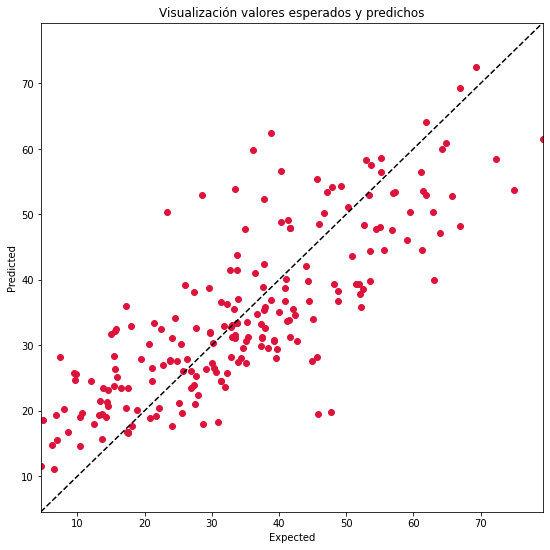

In [ ]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = plt.scatter(data=df, x='Expected', y='Predicted', color='crimson')
plt.title('Visualización valores esperados y predichos')
plt.xlabel('Expected')
plt.ylabel('Predicted')
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
plt.xlim(start, end)
plt.ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')